## ML Assignment 2 - Reference Solutions

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

### a) Generate a random set of two-dimensional points and plot them as a scatter plot.

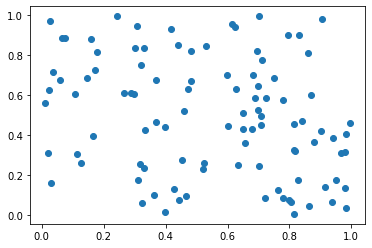

In [93]:
#Generate 100 random points and plot them

x = np.random.random((100, 2))
plt.scatter(x[:,0],x[:,1])
plt.show()

### b) Plot the density of the 2D Gaussian distribution with:
means =[0, 1] and Covariance matrix = [ [1, 0.25], [0.25, 1] ]

Reference:

https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

#### Basic steps to plot a Gaussian distribution:

1) As we need a 2-dimensional gaussian distribution, we will generate 2D coordinates. (x, y axis = random variables)

2) We will then calculate the value of pdf at these coordinates. (z axis = pdf of the random variables)

3) Once we have pdf values and their coordinates, we can now plot them using matplotlib. 

#### Points to note:
The gaussian with given means and variance is already set. We are only trying to generate coordiantes where we think the gausssian lies. By looking at the means we can tell peak of gaussian should be at (0,1) coordinate. Therefore, we will choose coordinates roughly around that point. 

Staying between (-3, 3) on both x and y axis generated a nice looking plot for me.

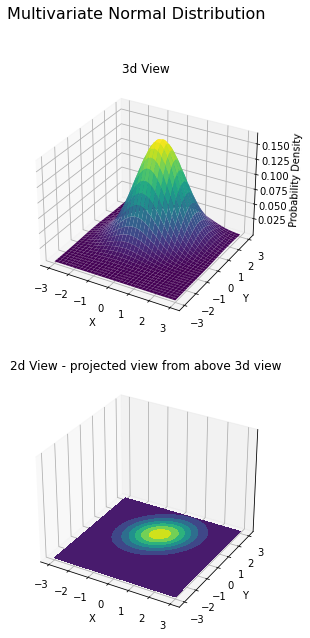

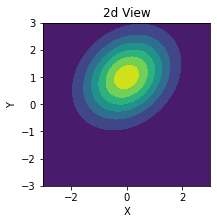

In [94]:
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0.25], [0.25,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
rv = multivariate_normal(mu, Sigma)
Z = multivariate_gaussian(pos, mu, Sigma)

# plot 3d views
fig = plt.figure(figsize=(10,10))
fig.suptitle('Multivariate Normal Distribution', fontsize=16)

ax1 = fig.add_subplot(2,1,1,projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probability Density')
ax1.set_title('3d View')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0)
#ax2.view_init(90, 270)
ax2.set_zticks([])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('2d View - projected view from above 3d view')

plt.show()

#plot 2d view
plt.figure(figsize=(3,3))
plt.contourf(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2d View')
plt.show()